## pair0055: 
Daily mean values of ozone values and radiation in the last 83 days of 2009 at 16 different places in Switzerland.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from diptest import diptest   

In [ ]:
cols = [f'Ozone_{i+1}' for i in range(16)] + [f'Temp_{i+1}' for i in range(16)]
df = pd.read_csv('datasets/pair0055.txt', sep=r'\s+' , header=None, names=cols)

In [ ]:
# Display few rows of the dataset
print(df.head(5)) 

   Ozone_1  Ozone_2  Ozone_3  Ozone_4  Ozone_5  Ozone_6  Ozone_7  Ozone_8  \
0     51.6     42.9     47.7     67.0     59.5     62.1     53.5     54.0   
1     70.5     59.9     64.6     82.4     73.1     73.4     70.1     70.7   
2     70.4     77.5     66.7     72.6     77.4     73.8     71.9     60.3   
3     53.3     87.6     63.6     74.0     79.4     68.6     63.6     59.0   
4     40.6     81.1     64.3     65.2     77.2     58.8     57.4     50.4   

   Ozone_9  Ozone_10  ...  Temp_7  Temp_8  Temp_9  Temp_10  Temp_11  Temp_12  \
0     60.2      74.9  ...    35.7    38.9    74.1     66.2     39.8     36.2   
1     76.5      78.3  ...   108.3   106.4    95.7    107.4    106.3     85.4   
2     65.4      72.0  ...   106.0    96.5    72.2     92.0     73.7     29.4   
3     63.4      73.9  ...   102.4   116.5   134.2    129.1    103.3     83.2   
4     49.4      68.3  ...   118.5   112.4    84.2    121.7    115.4     65.5   

   Temp_13  Temp_14  Temp_15  Temp_16  
0     62.4     5

In [4]:
# Combine all values of x and y 
combinedX = pd.concat([df[f'Ozone_{i+1}'] for i in range(16)], ignore_index=True)
combinedY = pd.concat([df[f'Temp_{i+1}'] for i in range(16)], ignore_index=True)

combined_df = pd.DataFrame({'Ozone': combinedX, 'Temperature': combinedY})
combined_df.head()

,Ozone,Temperature
0,51.6,75.3
1,70.5,116.6
2,70.4,84.1
3,53.3,141.2
4,40.6,130.3


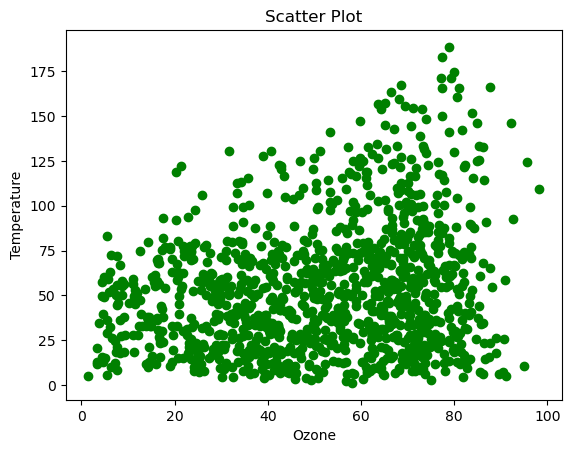

In [8]:
# Scatter Plot
plt.scatter(combinedX, combinedY, color='green')
plt.xlabel('Ozone')
plt.ylabel('Temperature')
plt.title('Scatter Plot')
plt.show()

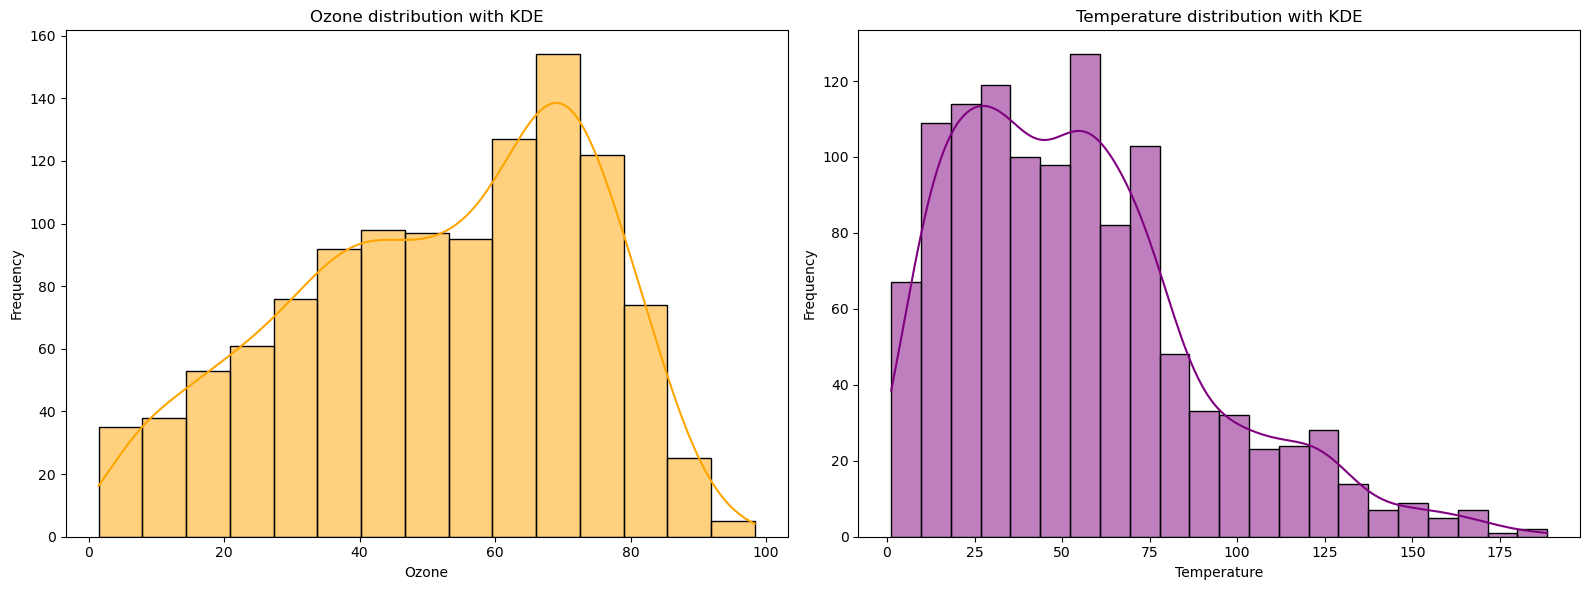

In [ ]:
# Plot the distribution of the data in both directions (x and y)
fig, axis = plt.subplots(1, 2, figsize=(16,6))

# Plot for (X -> Y)
sns.histplot(combinedX, kde=True, ax=axis[0], color='orange')
axis[0].set_xlabel('Ozone')
axis[0].set_ylabel('Frequency')
axis[0].set_title('Ozone distribution with KDE')

# Plot for (Y -> X)
sns.histplot(combinedY, kde=True, ax=axis[1], color='purple')
axis[1].set_xlabel('Temperature')
axis[1].set_ylabel('Frequency')
axis[1].set_title('Temperature distribution with KDE')

# Adjust layout to set the title and labels
plt.tight_layout()
plt.show()

In [7]:
# Dip-Test for x and y
dip_test, p_val = diptest(np.array(combinedX))
print(f"Dip-Test (X → Y): {dip_test}, p-value: {p_val}")   
dip_test, p_val = diptest(np.array(combinedY))
print(f"Dip-Test (Y → X): {dip_test}, p-value: {p_val}")   

Dip-Test (X → Y): 0.007816974513172977, p-value: 0.957403174813722
Dip-Test (Y → X): 0.012776692708333334, p-value: 0.24506518297232416


### Findings:
- The ground truth relationship is Y → X
- The dip test results suggest that the distribution of X → Y and Y → X both direction is likely **unimodal**, supported by a high p-value.
